# This file contains various data visualizations using Plotly

### Plotly with Python offers interactive maps and graphing options, as well as static graphing options

With Plotly, the visualizations can also be hosted on a dashboard online. However, I am using Github so those who are interested can see the code behind the graphs. This means that all images are static.

In [25]:
# Getting the needed libraries for the tasks at hand

import pandas as pd
from pandas import Series, DataFrame

import seaborn as sns

# Getting plotly for offline ready
import plotly
import plotly.plotly as py
plotly.tools.set_credentials_file

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True) # run at the start of every ipython notebook to use plotly.offline

from plotly.graph_objs import *

## A Geomap of the USA is displayed first

In [2]:
# Loading the dataset that has already been cleaned and processed
df = pd.read_csv('organic_farms_2011.csv')

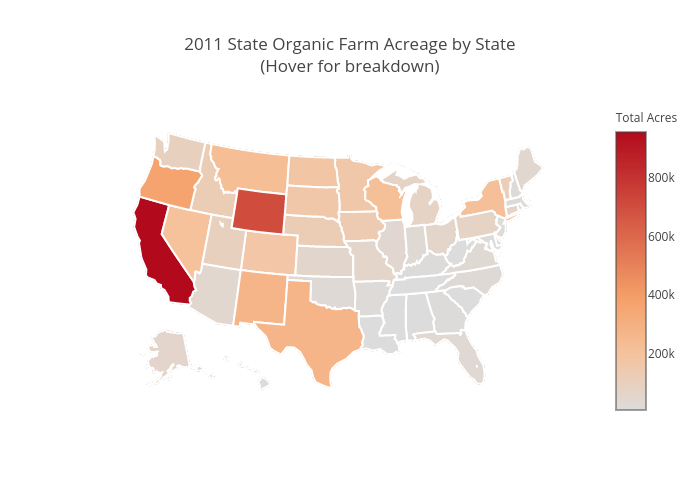

In [32]:
# This is all the code that is required to set up the USA map, and plot the data inside the map
# If not interested, feel free to scoll past for the interactive map!

# Data source: USDA, Economic Research Service, based on information from USDA-accredited State and private organic certifiers.  

for col in df.columns:
    df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df['text'] = df['States'] + '<br>' +\
    'Certified Operations '+df['Number of certified operations*']+'<br>'+\
    'Crops '+df['Crops']+'<br>'+\
    'Pasture & Rangeland '+df['Pasture & rangeland']+'<br>'+\
    'Total ' + df['Total']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = True,
        locations = df['Code'],
        z = df['Total'].astype(float),
        locationmode = 'USA-states',
        text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Total Acres"
        )
    ) ]

layout = dict(
        title = '2011 State Organic Farm Acreage by State<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = dict(data=data, layout=layout)

py.image.ishow(fig)

### Let's simulate the financial gain and loss of 4 companies.

In [5]:
# Importing another module for this next visulaztion with Plotly
import cufflinks as cf

In [13]:
# Creating a dataset to be used

dataset = cf.datagen.lines(4, columns = ['All Tek Company', 'Data Driver',
                                        'Paper and Pencil', 'All Brains'])

dataset[:] = dataset[:] * 100


# Let's take a sneak peek at our random dataset
dataset.head()

,All Tek Company,Data Driver,Paper and Pencil,All Brains
2015-01-01,68.281248,47.340678,-22.338031,-43.198033
2015-01-02,186.678575,81.970342,228.255156,-75.951845
2015-01-03,251.481786,229.571093,374.170433,31.878211
2015-01-04,182.078201,165.037747,411.116099,35.921599
2015-01-05,235.989540,16.648145,456.819296,-107.313635


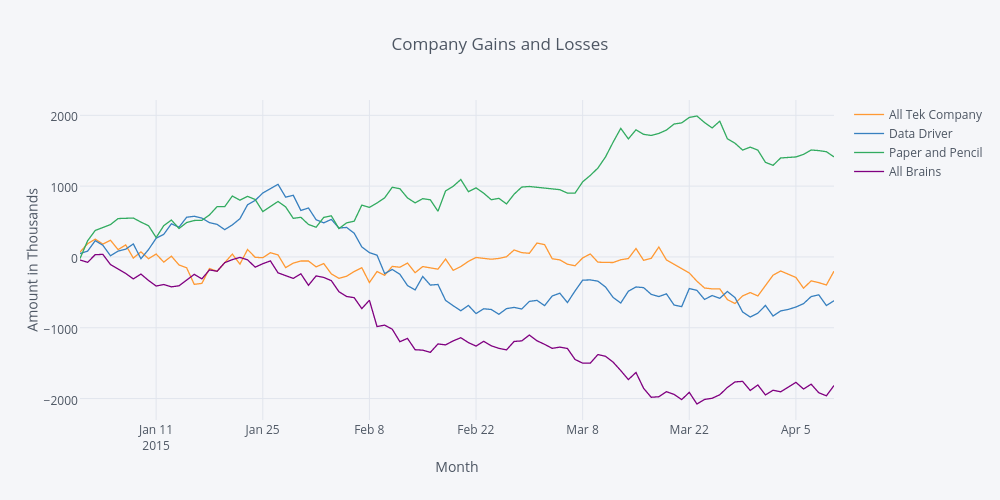

In [30]:
# Plotting the line graph
dataset.iplot(title='Company Gains and Losses', xTitle = 'Month', yTitle = 'Amount in Thousands', asImage= True)


### Let's create a dataset so make a piechart!

In [15]:
# Generating random dataset for pie chart
# If dataset exists, all that would be needed is to use .groupyby() function to add data up by catagories

pie = cf.datagen.pie()
pie.head()

,labels,values
0,GEU.ZH,87
1,ZZM.FX,97
2,XYW.JN,24
3,CTJ.NQ,46
4,PIZ.RK,47


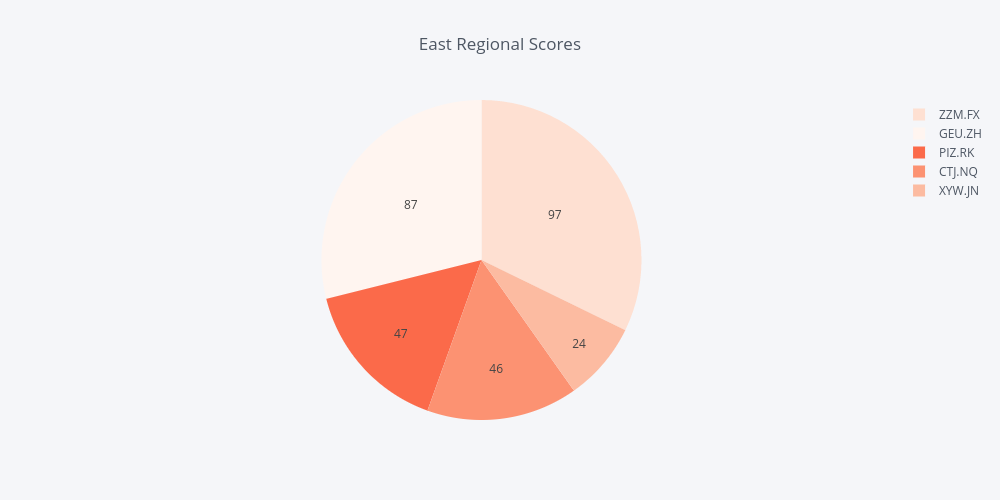

In [16]:
pie.iplot(kind = 'pie', title= 'East Regional Scores', labels = 'labels', values = 'values', textinfo = 'value', 
          colorscale = 'reds', asImage= True)

### Next let's make a donut piechart for fun

In [18]:
# Generating another ranodom dataset
pie2 = cf.datagen.pie()
pie2.head()

,labels,values
0,LRH.FU,75
1,XAH.IH,81
2,ZMA.KK,7
3,FFA.FC,68
4,TIR.RQ,1


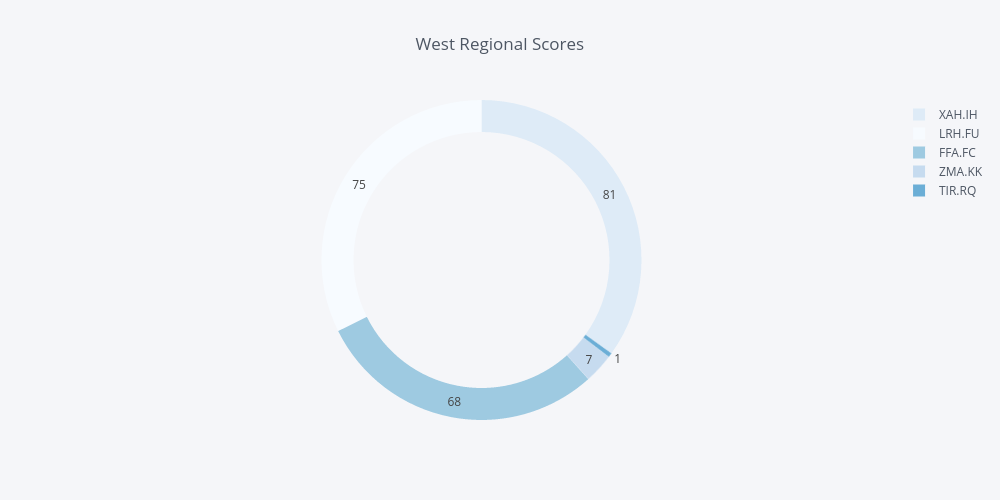

In [19]:
pie2.iplot(kind = 'pie', title= 'West Regional Scores', labels = 'labels', values = 'values', textinfo = 'value',
           colorscale = 'blues', hole = .8, asImage= True)

### Let's do a heatmap visualization next!

### This dataset will be using the airplane dataset from seaborn

In [20]:
# Loading the dataset

flight_dframe = sns.load_dataset('flights')
flight_dframe.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


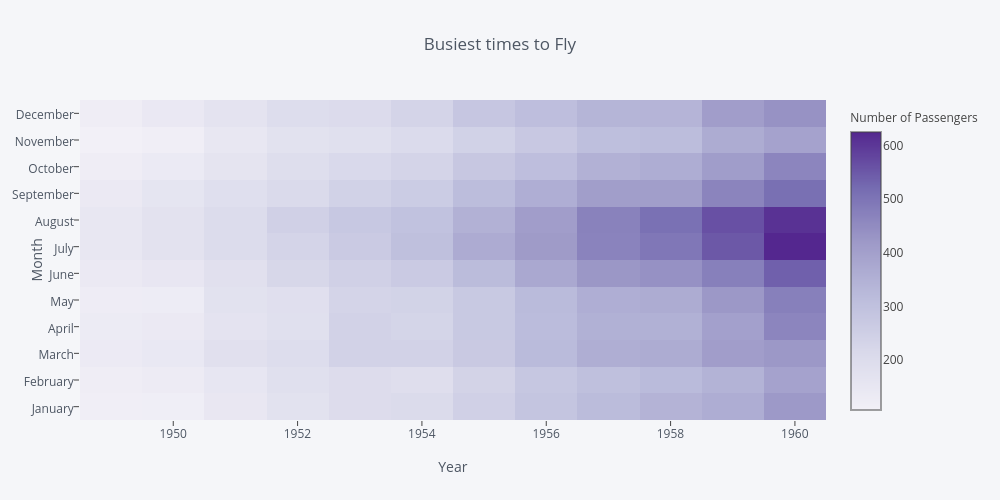

In [21]:
# Plotting the heatmap

data = [ dict(
        type='heatmap',
        colorscale = scl,
        autocolorscale = False,
        x = flight_dframe['year'],
        z = flight_dframe['passengers'].astype(float),
        y = flight_dframe['month'],
        colorbar = dict(
            title = "Number of Passengers"
        )
    ) ]


flight_dframe.iplot(data= data, kind = 'heatmap', colorscale='spectral', xTitle= 'Year', yTitle = 'Month', 
                    title= 'Busiest times to Fly', asImage= True)